In [21]:
import glob
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#obtener el directorio de trabajo
os.getcwd()

'/Users/ceciliaguillametchargue'

In [3]:
#cambiar el directorio de trabajo
os.chdir('/Users/ceciliaguillametchargue/Library/Mobile Documents/com~apple~CloudDocs/Documents/Proyectos/RSU/Encuesta/Planillas Residuos para estadística')

In [4]:
# Primero especificamos un patrón del archivo y lo pasamos como parámetro en la función glob
excel_files = glob.glob('*.xlsx')
# Mostrar el archivo csv_files, el cual es una lista de nombres
print(excel_files)

['Bº Andorra Plaza.xlsx', 'Bº  MG- P.xlsx', 'B Pipo Plaza.xlsx', 'Bº  640-AN.xlsx', 'Bº  M-P.xlsx', 'Bª Andino Plaza.xlsx', 'Bº Centro chica Plaza.xlsx', 'Bº Don Bosco.xlsx', 'Bº ALAKALUFES PLAZA.xlsx', 'Bº Andino AN Lag. Diablo.xlsx', 'B Centro - Plaza Godoy y Gdor Paz.xlsx', 'Bº 640 Plaza.xlsx', 'Bº Ecológico Plaza.xlsx', 'Bº Centro Plaza del libro.xlsx', 'Bº Ecológico - AN-.xlsx', 'Bº  MG- AN.xlsx', 'Bº Pipo - AN.xlsx', 'B Mirador del Fernandez.xlsx', 'Bº  M-AN.xlsx', 'Bº Alakalufes 2 AN.xlsx']


In [5]:
list_data = []
  
# Escribimos un loop que irá a través de cada uno de los nombres de archivo a través de globbing y el resultado final será la lista dataframes ya 
# procesados, dado que necesitamos que la información esté en formato wide

for file in excel_files:
    data = pd.DataFrame(pd.read_excel(file, sheet_name = 'Hoja1', header = 0, index_col = 0)) #carga de datos
    data.reset_index(inplace=True, drop=False) #reset de los indices
    data.set_index('Sector', inplace = True) #setea al sector como indice
    data = np.transpose(data) #traspone los datos

    data.reset_index(inplace=True, drop=False) #reset de indices para que el sector sea una columna
   
    data["Barrio"] = file #agregamos la columna Barrio y se le asigna como dato el nombre del archivo
    
    data = data[['index','Cuadrante', 'Observacion','Barrio', '1) RESTOS DE COMIDA', '2) OTROS ORGÁNICOS', '3.1) PLÁSTICOS: PET Y PEAD ', 
    '3.2) PLÁSTICO UN SOLO USO', '3.3) OTROS PLÁSTICOS', '4.1) ALUMINIO (METALES)', '4.2) FERROSOS LATA ', '4.3) OTROS METALES', '5) VIDRIO',
    '6.1) CARTÓN DE TODO TIPO', '6.1) OTROS PAPELES', '7) TETRAPACK', '8.1) ABSORBENTES ', '8.2) RAEE ', '8.3) PILAS Y BATERÍAS',
    '8.4) OTROS ASIMI A PELIGR', '9) TEXTILES Y DE INDUM', '10) OTROS INORGÁNICOS', '11) COLILLAS']] #reordenamos las columnas
    
    data = pd.melt(data, id_vars=['index','Cuadrante', 'Observacion', 'Barrio'], value_vars=data.iloc[:,4:]) #pasamos los datos a formato wide
    list_data.append(data) #concatenamos los datos en una lista
    
df = pd.concat(list_data,ignore_index=True)

In [6]:
# renombramos algunas columnas
df.rename(columns = {'index': 'Sector', 'Sector': 'Tipo'}, inplace = True)

In [7]:
# separamos por el punto y nos quedamos con la primer columna (.str[0])
df['Sector'] = df['Sector'].str.split('.').str[0]
df

,Sector,Cuadrante,Observacion,Barrio,Tipo,value
0,SECTOR C (CERCA),Cuadrante 1,DETALLE,Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,NaN
1,SECTOR C (CERCA),Cuadrante 1,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,NaN
2,SECTOR C (CERCA),Cuadrante 2,DETALLE,Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,NaN
3,SECTOR C (CERCA),Cuadrante 2,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,NaN
4,SECTOR C (CERCA),Cuadrante 3,DETALLE,Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,NaN
...,...,...,...,...,...,...
6835,SECTOR F (FONDO/LEJOS),Cuadrante 1,PESO (g),Bº Alakalufes 2 AN.xlsx,11) COLILLAS,0
6836,SECTOR F (FONDO/LEJOS),Cuadrante 2,DETALLE,Bº Alakalufes 2 AN.xlsx,11) COLILLAS,NaN
6837,SECTOR F (FONDO/LEJOS),Cuadrante 2,PESO (g),Bº Alakalufes 2 AN.xlsx,11) COLILLAS,0
6838,SECTOR F (FONDO/LEJOS),Cuadrante 3,DETALE,Bº Alakalufes 2 AN.xlsx,11) COLILLAS,NaN


In [8]:
# seleccionamos solo los pesos y no el detalle
df_peso = df[df['Observacion'] == 'PESO (g)']

In [9]:
# cargamos dataframe de superficies por area
sup = pd.read_excel('/Users/ceciliaguillametchargue/Library/Mobile Documents/com~apple~CloudDocs/Documents/Proyectos/RSU/Encuesta/Superficies.xlsx')

In [10]:
# calculamos el area por parcela
sup['Parcela'] = sup['Superficie (m2)']/9

In [11]:
sup

,Barrio,Area,Largo,Ancho,Superficie (m2),Parcela
0,Bº Pipo - AN.xlsx,Area natural,48.0,37.00,1776.000,197.333333
1,B Pipo Plaza.xlsx,Plaza,22.5,32.40,729.000,81.000000
2,Bº Ecológico - AN-.xlsx,Area natural,75.0,50.00,3750.000,416.666667
3,Bº Ecológico Plaza.xlsx,Plaza,36.0,36.00,1296.000,144.000000
4,B Mirador del Fernandez.xlsx,Plaza,50.6,36.00,1821.600,202.400000
5,B Centro - Plaza Godoy y Gdor Paz.xlsx,Plaza,28.2,39.80,1122.360,124.706667
6,Bº Centro chica Plaza.xlsx,Plaza,43.0,25.50,523.590,58.176667
7,Bº 640-AN.xlsx,Area natural,42.0,56.00,2352.000,261.333333
8,Bº 640 Plaza.xlsx,Plaza,48.0,44.00,2112.000,234.666667
9,Bº Andino AN Lag. Diablo.xlsx,Area natural,75.0,90.00,6750.000,750.000000


In [22]:
# asignamos el área según el barrio. La info del área la sacamos del dataframe que tiene las superficies
df_peso['Area'] = df_peso['Barrio'].map(dict(zip(sup['Barrio'], sup['Area']))).fillna('-')

In [23]:
# convertimos a numérica la columna value
df_peso['value'] = pd.to_numeric(df_peso['value'], errors='coerce')

In [24]:
# asignamos el valor de la parcela a cada uno de los barrios
df_peso['Parcela'] = df_peso['Barrio'].map(dict(zip(sup['Barrio'], sup['Parcela'])))

In [25]:
df_peso.head()

,Sector,Cuadrante,Observacion,Barrio,Tipo,value,Area,Parcela,valor/m2
1,SECTOR C (CERCA),Cuadrante 1,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,Plaza,30.222222,0.0
3,SECTOR C (CERCA),Cuadrante 2,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,Plaza,30.222222,0.0
5,SECTOR C (CERCA),Cuadrante 3,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,Plaza,30.222222,0.0
7,SECTOR M (MEDIO),Cuadrante 1,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,Plaza,30.222222,0.0
9,SECTOR M (MEDIO),Cuadrante 2,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,Plaza,30.222222,0.0


In [26]:
# convertimos a numérica la columna parcela
df_peso['Parcela'] = pd.to_numeric(df_peso['Parcela'], errors='coerce')

In [27]:
# reemplazo de los valores na por 0
df_peso['value'] = np.where(df_peso['value'].isna(), 0, df_peso['value'])

In [28]:
# creamos la columna valor/m2
df_peso['valor/m2'] = df_peso['value']/df_peso['Parcela']

In [29]:
df_peso.head()

,Sector,Cuadrante,Observacion,Barrio,Tipo,value,Area,Parcela,valor/m2
1,SECTOR C (CERCA),Cuadrante 1,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,Plaza,30.222222,0.0
3,SECTOR C (CERCA),Cuadrante 2,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,Plaza,30.222222,0.0
5,SECTOR C (CERCA),Cuadrante 3,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,Plaza,30.222222,0.0
7,SECTOR M (MEDIO),Cuadrante 1,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,Plaza,30.222222,0.0
9,SECTOR M (MEDIO),Cuadrante 2,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,Plaza,30.222222,0.0


In [129]:
# guardamos como un excel
df_peso.to_excel("base_residuos.xlsx")

In [30]:
df_peso['Barrio_'] = np.where(df_peso['Barrio'].str.contains('Bº Andorra Plaza'), 'Bº Andorra', 
                             np.where(df_peso['Barrio'].str.contains('Bº  MG'), 'Bº Monte Gallinero', 
                                     np.where(df_peso['Barrio'].str.contains('B Pipo'), 'Bº Pipo',
                                             np.where(df_peso['Barrio'].str.contains('Bº  640'), 'Bº 640', 
                                                     np.where(df_peso['Barrio'].str.contains('Bº  M'), 'Bº Malvinas', 
                                                             np.where(df_peso['Barrio'].str.contains('Bª Andino'), 'Bº Andino', 
                                                                     np.where(df_peso['Barrio'].str.contains('Bº Centro'), 'Bº Centro', 
                                                                             np.where(df_peso['Barrio'].str.contains('Bº Don Bosco'), 'Bº Don Bosco', 
                                                                                     np.where(df_peso['Barrio'].str.contains('Bº ALAKALUFES'), 'Bº Alakalufes', 
                                                                                             np.where(df_peso['Barrio'].str.contains('Bº Andino'), 'Bº Andino', 
                                                                                                     np.where(df_peso['Barrio'].str.contains('B Centro'), 'Bº Centro', 
                                                                                                             np.where(df_peso['Barrio'].str.contains('Bº 640'), 'Bº 640', 
                                                                                                                     np.where(df_peso['Barrio'].str.contains('Bº Ecológico'), 'Bº Ecológico', 
                                                                                                                             np.where(df_peso['Barrio'].str.contains('Bº Pipo'), 'Bº Pipo', 
                                                                                                                                     np.where(df_peso['Barrio'].str.contains('Bº Alakalufes'), 'Bº Alakalufes',
                                                                                                                                              np.where(df_peso['Barrio'].str.contains('B Mirador del Fernandez'), 'Bº Mirador del Fernandez', df_peso['Barrio']))))))))))))))))

In [31]:
df_peso['Tipo_agrupados'] = np.where(df_peso['Tipo'].str.contains('PLÁSTICOS: PET Y PEAD'), 'PLÁSTICOS', 
                             np.where(df_peso['Tipo'].str.contains('PLÁSTICO UN SOLO USO'), 'PLÁSTICOS', 
                                     np.where(df_peso['Tipo'].str.contains('OTROS PLÁSTICOS'), 'PLÁSTICOS',
                                             np.where(df_peso['Tipo'].str.contains('ALUMINIO'), 'METALES', 
                                                     np.where(df_peso['Tipo'].str.contains('FERROSOS LATA '), 'METALES', 
                                                             np.where(df_peso['Tipo'].str.contains('OTROS METALES'), 'METALES', 
                                                                     np.where(df_peso['Tipo'].str.contains('CARTÓN DE TODO TIPO'), 'CARTÓN Y PAPELES', 
                                                                             np.where(df_peso['Tipo'].str.contains('OTROS PAPELES'), 'CARTÓN Y PAPELES', 
                                                                                     np.where(df_peso['Tipo'].str.contains('ABSORBENTES '), 'ASIM A PELIGROSOS', 
                                                                                             np.where(df_peso['Tipo'].str.contains('RAEE '), 'ASIM A PELIGROSOS', 
                                                                                                     np.where(df_peso['Tipo'].str.contains('PILAS Y BATERÍAS'), 'ASIM A PELIGROSOS', 
                                                                                                             np.where(df_peso['Tipo'].str.contains('OTROS ASIMI A PELIGR'), 'ASIM A PELIGROSOS', 
                                                                                                                     np.where(df_peso['Tipo'].str.contains('RESTOS DE COMIDA'), 'RESTOS DE COMIDA', 
                                                                                                                             np.where(df_peso['Tipo'].str.contains('COLILLAS'), 'COLILLAS', 
                                                                                                                                     np.where(df_peso['Tipo'].str.contains('OTROS ORGÁNICOS'), 'OTROS ORGÁNICOS', 
                                                                                                                                             np.where(df_peso['Tipo'].str.contains('TETRAPACK'), 'TETRA PAK', 
                                                                                                                                                     np.where(df_peso['Tipo'].str.contains('TEXTILES Y DE INDUM'), 'TEXTILES Y DE INDUM', 
                                                                                                                                                     np.where(df_peso['Tipo'].str.contains('OTROS INORGÁNICOS'), 'OTROS INORGÁNICOS', 
                                                                                                                                                     np.where(df_peso['Tipo'].str.contains('VIDRIO'), 'VIDRIO', df_peso['Tipo'])))))))))))))))))))

In [32]:
df_peso.head()

,Sector,Cuadrante,Observacion,Barrio,Tipo,value,Area,Parcela,valor/m2,Barrio_,Tipo_agrupados
1,SECTOR C (CERCA),Cuadrante 1,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,Plaza,30.222222,0.0,Bº Andorra,RESTOS DE COMIDA
3,SECTOR C (CERCA),Cuadrante 2,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,Plaza,30.222222,0.0,Bº Andorra,RESTOS DE COMIDA
5,SECTOR C (CERCA),Cuadrante 3,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,Plaza,30.222222,0.0,Bº Andorra,RESTOS DE COMIDA
7,SECTOR M (MEDIO),Cuadrante 1,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,Plaza,30.222222,0.0,Bº Andorra,RESTOS DE COMIDA
9,SECTOR M (MEDIO),Cuadrante 2,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,Plaza,30.222222,0.0,Bº Andorra,RESTOS DE COMIDA


In [33]:
# Graficos

import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import numpy as np
from scipy import stats
import math

In [34]:
order_val = ['Bº Monte Gallinero', 'Bº Pipo', 'Bº 640', 'Bº Malvinas', 'Bº Andino', 'Bº Centro', 'Bº Don Bosco',
         'Bº Ecológico', 'Bº Mirador del Fernandez', 'Bº Andorra', 'Bº Alakalufes']

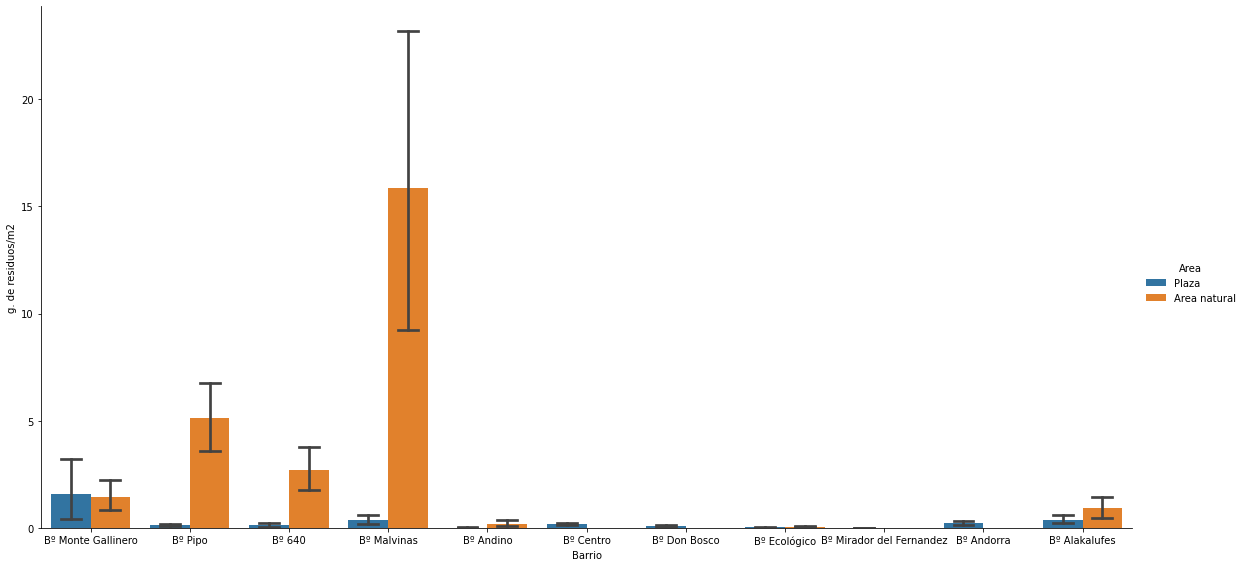

In [35]:
g1 = sns.catplot(data = df_peso, kind = "bar", x = 'Barrio_', y = 'valor/m2', hue = 'Area',
           height = 8, aspect = 2, ci = 95, capsize = 0.2, order = order_val)
g1.set(xlabel = 'Barrio', ylabel = 'g. de residuos/m2')
g1.savefig('Barrio_gr.jpg', bbox_inches='tight')

In [36]:
df_peso['ln_valor/m2'] = pow(df_peso['valor/m2'], 2)

In [163]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=df_peso, dv='ln_valor/m2', group='Area')

,W,pval,normal
Plaza,0.012698,0.0,False
Area natural,0.062278,0.0,False


In [187]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df_peso, dv='ln_valor/m2', group='Area', method='bartlett')

/Users/ceciliaguillametchargue/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


,T,pval,equal_var
bartlett,NaN,NaN,False


In [184]:
# Test ANOVA de una vía (One-way ANOVA)
# ==============================================================================
pg.anova(data=df_peso, dv='valor/m2', between='Area', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Area,9455.459839,1,9455.459839,73.422237,1.560552e-17,0.021029
1,Within,440176.753041,3418,128.781964,NaN,NaN,NaN


In [116]:
df_peso_1 = df_peso[df_peso['Area'] == 'Plaza']
df_peso_2 = df_peso[df_peso['Area'] == 'Area natural']
stats.kruskal(df_peso_1['valor/m2'], df_peso_2['valor/m2'])

In [96]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=df_peso, dv='valor/m2', group='Tipo_agrupados')

,W,pval,normal
RESTOS DE COMIDA,0.119284,3.158259e-28,False
OTROS ORGÁNICOS,0.141089,5.942027e-28,False
PLÁSTICOS,0.313869,1.266101e-40,False
METALES,0.102280,1.821688e-44,False
VIDRIO,0.390856,2.472803e-24,False
CARTÓN Y PAPELES,0.182634,1.037607e-36,False
TETRA PAK,0.366374,9.809545e-25,False
ASIM A PELIGROSOS,0.064983,0.000000e+00,False
TEXTILES Y DE INDUM,0.173181,1.542205e-27,False
OTROS INORGÁNICOS,0.147657,7.205828e-28,False


In [97]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df_peso, dv='valor/m2', group='Tipo_agrupados', method='levene')

,W,pval,equal_var
levene,2.922608,0.001185,False


In [98]:
# Test ANOVA de una vía (One-way ANOVA)
# ==============================================================================
pg.anova(data=df_peso, dv='valor/m2', between='Tipo_agrupados', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Tipo_agrupados,3872.446494,10,387.244649,2.961499,0.001025,0.008612
1,Within,445759.766385,3409,130.759685,NaN,NaN,NaN


In [164]:
df_peso_1 = df_peso[df_peso['Area'] == 'Plaza']
df_peso_2 = df_peso[df_peso['Area'] == 'Area natural']
stats.kruskal(df_peso_1['valor/m2'], df_peso_2['valor/m2'])

KruskalResult(statistic=56.2838113443233, pvalue=6.272978553338433e-14)

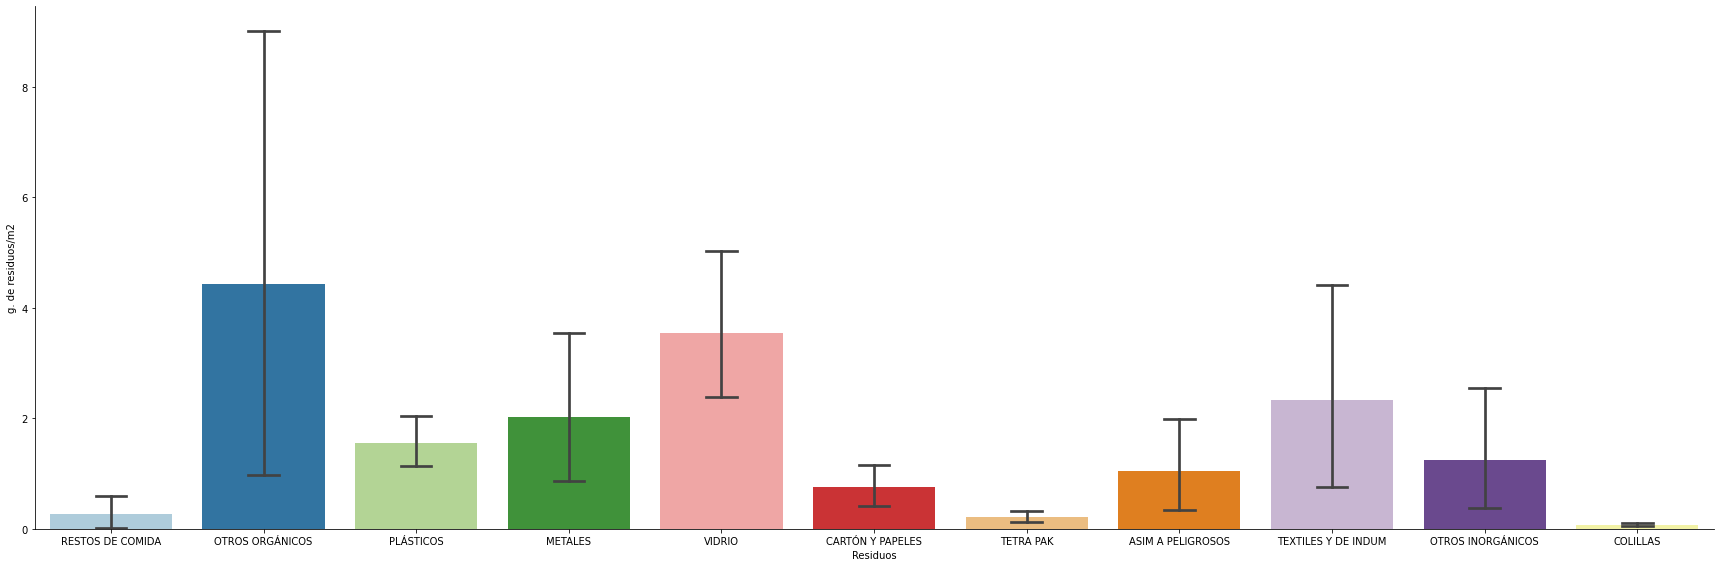

In [172]:
g2 = sns.catplot(data = df_peso, kind = "bar", x = 'Tipo_agrupados', y = 'valor/m2',
           height = 8, aspect = 3, ci = 95, capsize = 0.2, palette = "Paired")
g2.set(xlabel = 'Residuos', ylabel = 'g. de residuos/m2')
g2.savefig('Tipo_res_gr.jpg', bbox_inches='tight')

In [168]:
df_peso_1 = df_peso[df_peso['Tipo_agrupados'] == 'RESTOS DE COMIDA']
df_peso_2 = df_peso[df_peso['Tipo_agrupados'] == 'OTROS ORGÁNICOS']
df_peso_3 = df_peso[df_peso['Tipo_agrupados'] == 'PLÁSTICOS']
df_peso_4 = df_peso[df_peso['Tipo_agrupados'] == 'METALES']
df_peso_5 = df_peso[df_peso['Tipo_agrupados'] == 'VIDRIO']
df_peso_6 = df_peso[df_peso['Tipo_agrupados'] == 'CARTÓN Y PAPELES']
df_peso_7 = df_peso[df_peso['Tipo_agrupados'] == 'TETRA PAK']
df_peso_8 = df_peso[df_peso['Tipo_agrupados'] == 'ASIM A PELIGROSOS']
df_peso_9 = df_peso[df_peso['Tipo_agrupados'] == 'TEXTILES Y DE INDUM']
df_peso_10 = df_peso[df_peso['Tipo_agrupados'] == 'OTROS INORGÁNICOS']
df_peso_11 = df_peso[df_peso['Tipo_agrupados'] == 'COLILLAS']

stats.kruskal(df_peso_1['valor/m2'], df_peso_2['valor/m2'], df_peso_3['valor/m2'], df_peso_4['valor/m2'], 
              df_peso_5['valor/m2'], df_peso_6['valor/m2'], df_peso_7['valor/m2'], df_peso_8['valor/m2'],
              df_peso_9['valor/m2'], df_peso_10['valor/m2'], df_peso_11['valor/m2'])

KruskalResult(statistic=658.2288866944018, pvalue=5.779419389116508e-135)

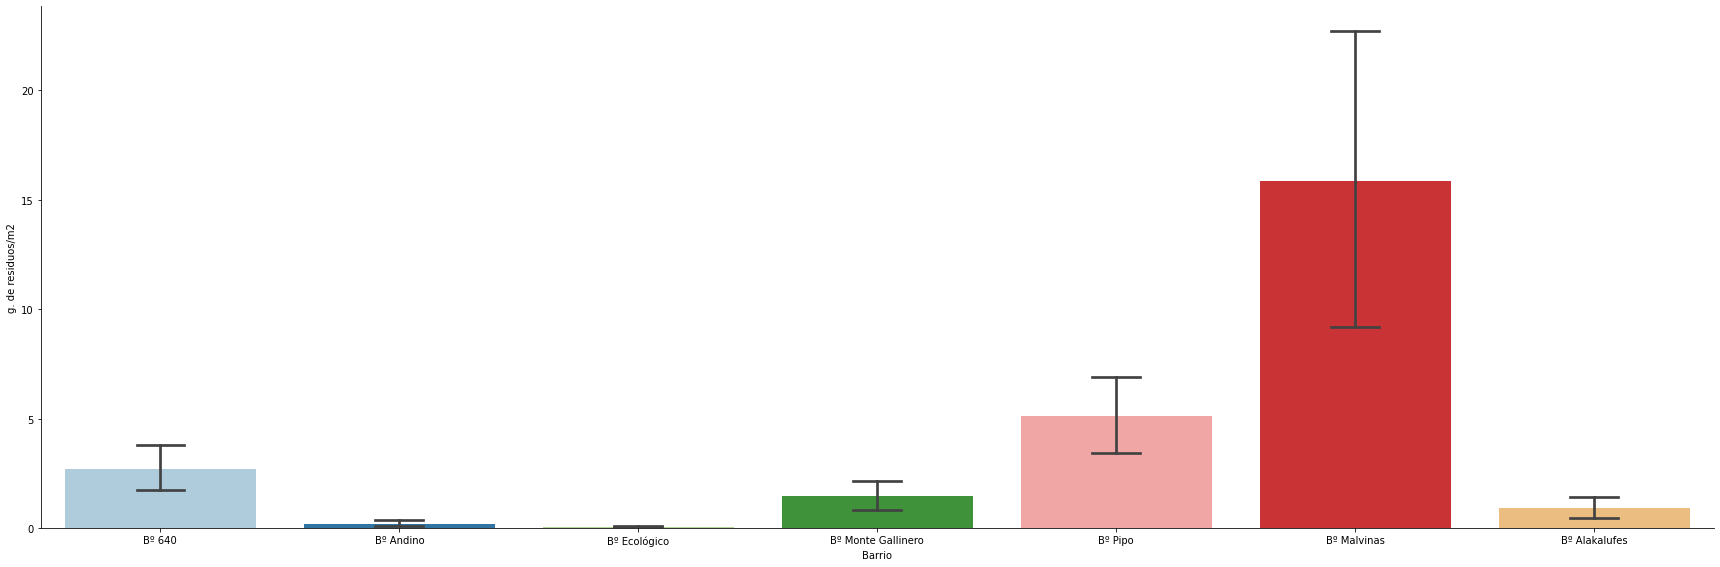

In [46]:
g3 = sns.catplot(data = df_peso[df_peso.Area == 'Area natural'], kind = "bar", x = 'Barrio_', y = 'valor/m2',
           height = 8, aspect = 3, ci = 95, capsize = 0.2, palette = "Paired")
g3.set(xlabel = 'Barrio', ylabel = 'g. de residuos/m2')

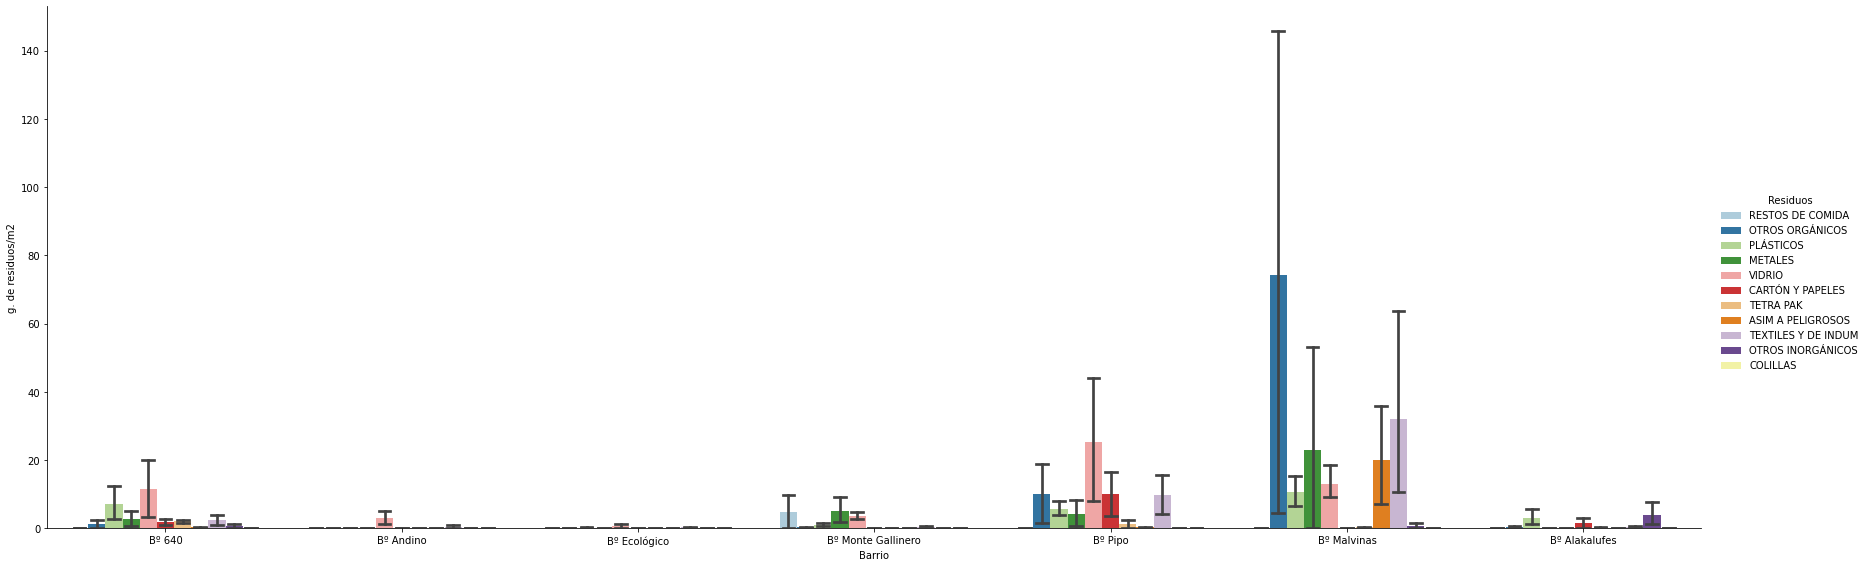

In [177]:
g4 = sns.catplot(data = df_peso[df_peso.Area == 'Area natural'], kind = "bar", x = 'Barrio_', y = 'valor/m2', hue = 'Tipo_agrupados',
           height = 8, aspect = 3, ci = 95, capsize = 0.05, palette = "Paired")
g4.set(xlabel = 'Barrio', ylabel = 'g. de residuos/m2')
g4._legend.set_title('Residuos')
g4.savefig('AN_tipo_gr.jpg', bbox_inches='tight')

In [174]:
df_peso_1 = df_peso[df_peso.Area == 'Area natural']
df_peso_1['Barrio_'].unique()

array(['Bº 640', 'Bº Andino', 'Bº Ecológico', 'Bº Monte Gallinero',
       'Bº Pipo', 'Bº Malvinas', 'Bº Alakalufes'], dtype=object)

In [175]:
df_peso_2 = df_peso_1[df_peso_1.Barrio_ == 'Bº 640']
df_peso_3 = df_peso_1[df_peso_1.Barrio_ == 'Bº Andino']
df_peso_4 = df_peso_1[df_peso_1.Barrio_ == 'Bº Ecológico']
df_peso_5 = df_peso_1[df_peso_1.Barrio_ == 'Bº Monte Gallinero']
df_peso_6 = df_peso_1[df_peso_1.Barrio_ == 'Bº Pipo']
df_peso_7 = df_peso_1[df_peso_1.Barrio_ == 'Bº Malvinas']
df_peso_8 = df_peso_1[df_peso_1.Barrio_ == 'Bº Alakalufes']

stats.kruskal(df_peso_2['valor/m2'], df_peso_3['valor/m2'], df_peso_4['valor/m2'], 
              df_peso_5['valor/m2'], df_peso_6['valor/m2'], df_peso_7['valor/m2'], df_peso_8['valor/m2'])

KruskalResult(statistic=140.93392868155834, pvalue=6.365784421679462e-28)

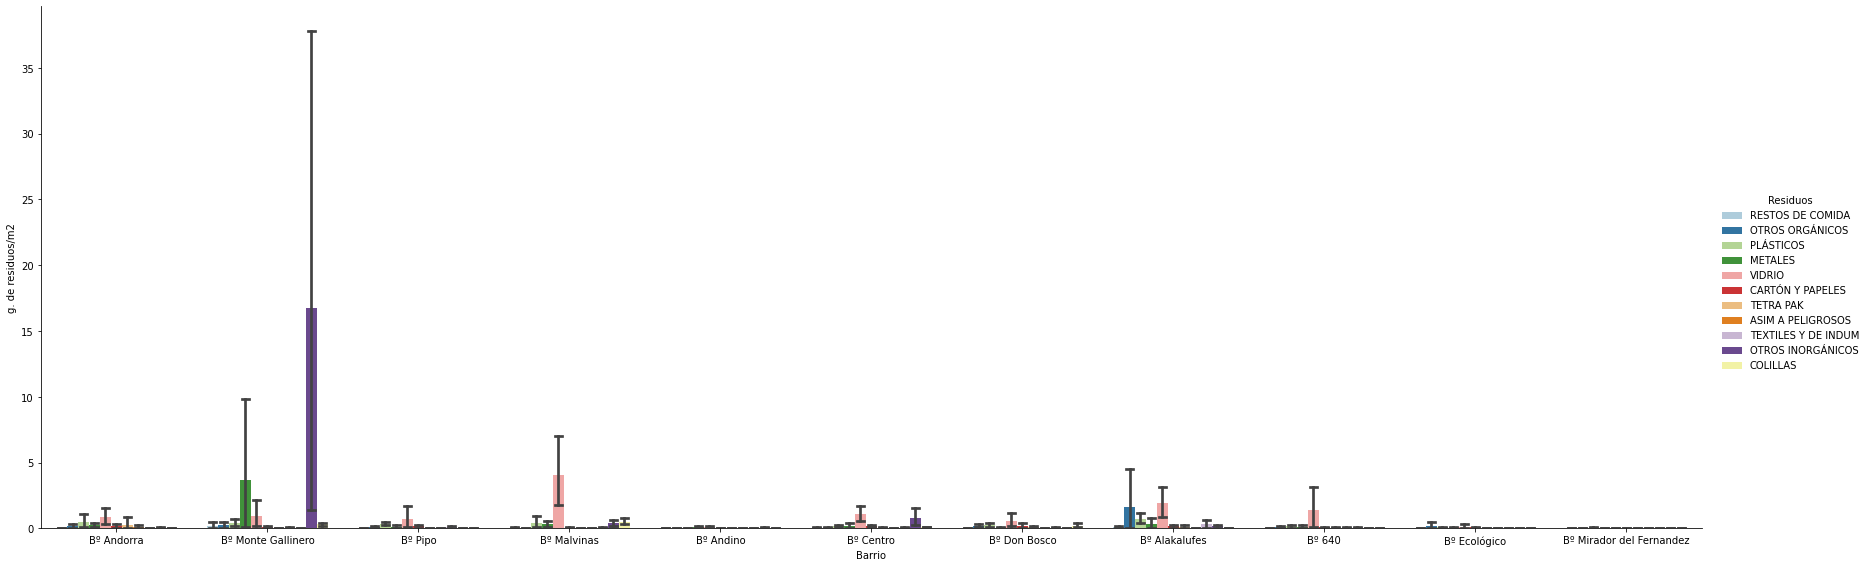

In [178]:
g5 = sns.catplot(data = df_peso[df_peso.Area == 'Plaza'], kind = "bar", x = 'Barrio_', y = 'valor/m2', hue = 'Tipo_agrupados',
           height = 8, aspect = 3, ci = 95, capsize = 0.05, palette = "Paired")
g5.set(xlabel = 'Barrio', ylabel = 'g. de residuos/m2')
g5._legend.set_title('Residuos')
g5.savefig('Plaza_tipo_gr.jpg', bbox_inches='tight')

In [179]:
df_peso_1 = df_peso[df_peso.Area == 'Plaza']
df_peso_1['Barrio_'].unique()

array(['Bº Andorra', 'Bº Monte Gallinero', 'Bº Pipo', 'Bº Malvinas',
       'Bº Andino', 'Bº Centro', 'Bº Don Bosco', 'Bº Alakalufes',
       'Bº 640', 'Bº Ecológico', 'Bº Mirador del Fernandez'], dtype=object)

In [180]:
df_peso_2 = df_peso_1[df_peso_1.Barrio_ == 'Bº 640']
df_peso_3 = df_peso_1[df_peso_1.Barrio_ == 'Bº Andino']
df_peso_4 = df_peso_1[df_peso_1.Barrio_ == 'Bº Ecológico']
df_peso_5 = df_peso_1[df_peso_1.Barrio_ == 'Bº Monte Gallinero']
df_peso_6 = df_peso_1[df_peso_1.Barrio_ == 'Bº Pipo']
df_peso_7 = df_peso_1[df_peso_1.Barrio_ == 'Bº Malvinas']
df_peso_8 = df_peso_1[df_peso_1.Barrio_ == 'Bº Alakalufes']
df_peso_9 = df_peso_1[df_peso_1.Barrio_ == 'Bº Andorra']
df_peso_10 = df_peso_1[df_peso_1.Barrio_ == 'Bº Centro']
df_peso_11 = df_peso_1[df_peso_1.Barrio_ == 'Bº Don Bosco']
df_peso_12 = df_peso_1[df_peso_1.Barrio_ == 'Bº Mirador del Fernandez']

stats.kruskal(df_peso_2['valor/m2'], df_peso_3['valor/m2'], df_peso_4['valor/m2'], 
              df_peso_5['valor/m2'], df_peso_6['valor/m2'], df_peso_7['valor/m2'], 
              df_peso_8['valor/m2'], df_peso_9['valor/m2'] , df_peso_10['valor/m2'], df_peso_11['valor/m2'], df_peso_12['valor/m2'])

KruskalResult(statistic=120.13263959526896, pvalue=4.7559604089000136e-21)

In [74]:
plot_order = df_peso[df_peso.Area == 'Plaza'].groupby('Barrio_')['valor/m2'].sum().sort_values(ascending=False).index.values
plot_order

array(['Bº Monte Gallinero', 'Bº Centro', 'Bº Alakalufes', 'Bº Malvinas',
       'Bº Andorra', 'Bº Pipo', 'Bº 640', 'Bº Don Bosco', 'Bº Ecológico',
       'Bº Andino'], dtype=object)

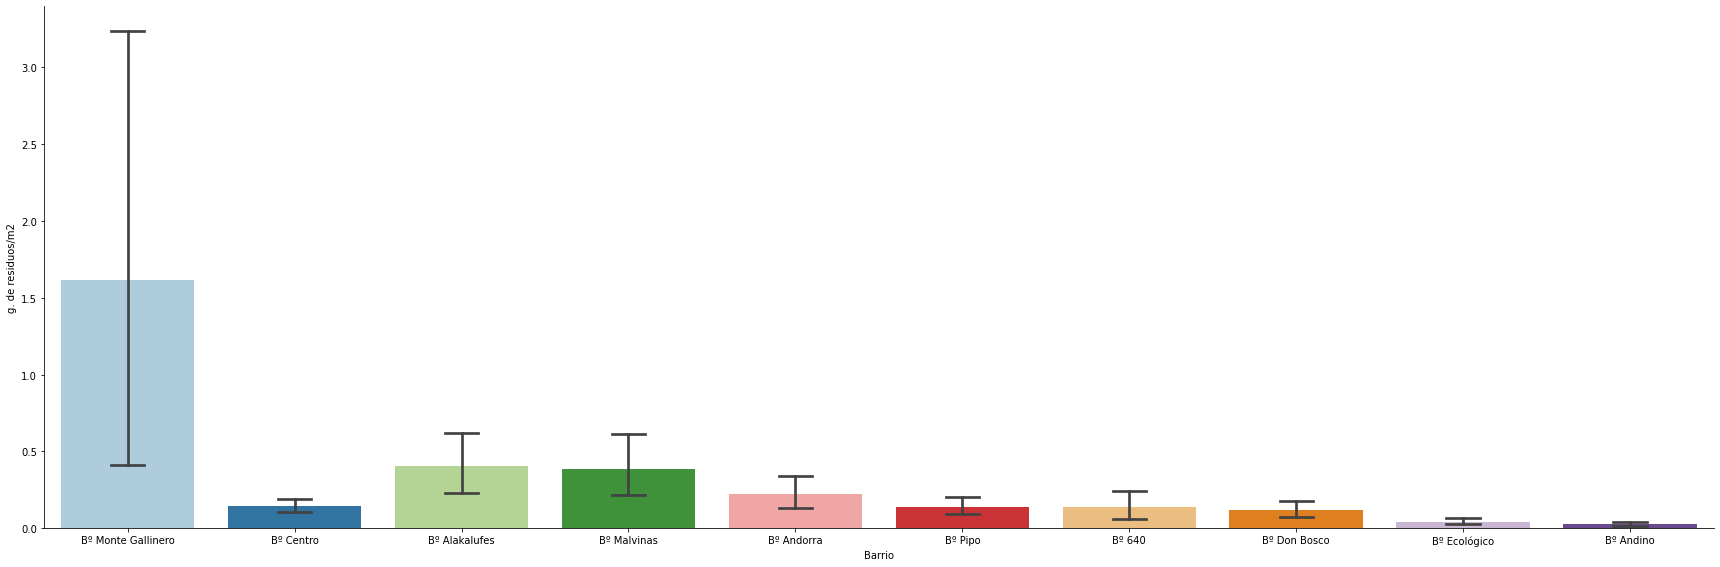

In [75]:
g5 = sns.catplot(data = df_peso[df_peso.Area == 'Plaza'], kind = "bar", x = 'Barrio_', y = 'valor/m2',
           height = 8, aspect = 3, ci = 95, capsize = 0.2, palette = "Paired", order = plot_order)
g5.set(xlabel = 'Barrio', ylabel = 'g. de residuos/m2')

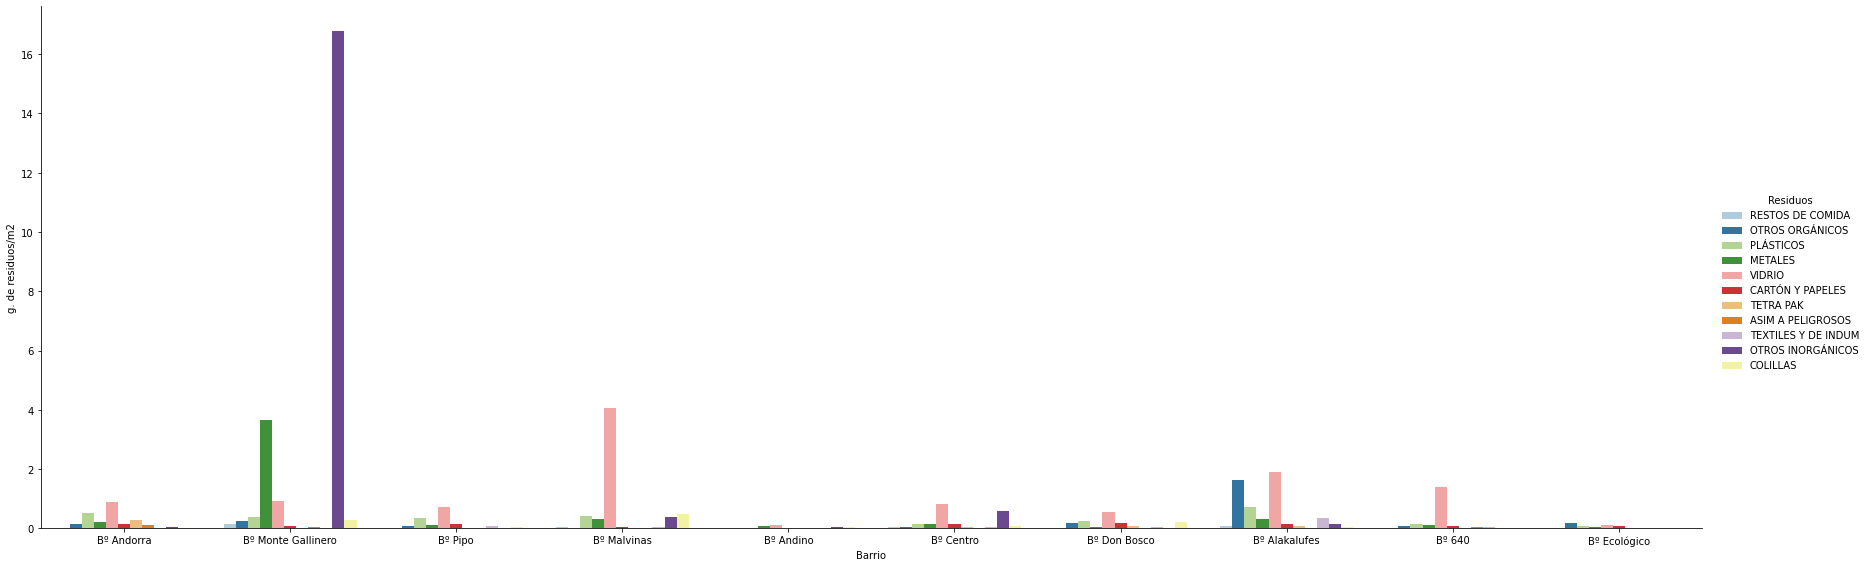

In [76]:
g6 = sns.catplot(data = df_peso[df_peso.Area == 'Plaza'], kind = "bar", x = 'Barrio_', y = 'valor/m2', hue = 'Tipo_agrupados',
           height = 8, aspect = 3, ci = None, palette = "Paired")
g6.set(xlabel = 'Barrio', ylabel = 'g. de residuos/m2')
g6._legend.set_title('Residuos')

In [39]:
df_peso['Barrio_'] = df_peso['Barrio_'].astype('category').cat.codes

/var/folders/59/v22gtmh50mj6t9q0g536zff80000gn/T/ipykernel_5953/616865946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peso['Barrio_'] = df_peso['Barrio_'].astype('category').cat.codes


In [42]:
df_peso['Area'] = df_peso['Area'].astype('category').cat.codes

/var/folders/59/v22gtmh50mj6t9q0g536zff80000gn/T/ipykernel_5953/1251872810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peso['Area'] = df_peso['Area'].astype('category').cat.codes


In [36]:
df_peso.dtypes

Sector              object
Cuadrante           object
Observacion         object
Barrio              object
Tipo                object
value              float64
Area                object
Parcela            float64
valor/m2           float64
Barrio_           category
Tipo_agrupados      object
dtype: object

In [43]:
df_peso.head()

,Sector,Cuadrante,Observacion,Barrio,Tipo,value,Area,Parcela,valor/m2,Barrio_,Tipo_agrupados
1,SECTOR C (CERCA),Cuadrante 1,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,1,30.222222,0.0,3,RESTOS DE COMIDA
3,SECTOR C (CERCA),Cuadrante 2,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,1,30.222222,0.0,3,RESTOS DE COMIDA
5,SECTOR C (CERCA),Cuadrante 3,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,1,30.222222,0.0,3,RESTOS DE COMIDA
7,SECTOR M (MEDIO),Cuadrante 1,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,1,30.222222,0.0,3,RESTOS DE COMIDA
9,SECTOR M (MEDIO),Cuadrante 2,PESO (g),Bº Andorra Plaza.xlsx,1) RESTOS DE COMIDA,0.0,1,30.222222,0.0,3,RESTOS DE COMIDA


In [46]:
import numpy as np
from matplotlib import pyplot
import spm1d


#(1) Conduct ANOVA:
alpha        = 0.05
FF           = spm1d.stats.anova2nested(df_peso['valor/m2'], df_peso['Barrio_'], df_peso['Area'], equal_var=True)
FFi          = FF.inference(0.05)
print( FFi )

#(2) Plot results:
pyplot.close('all')
FFi.plot(plot_threshold_label=True, plot_p_values=True)
pyplot.show()

ValueError: Design must be balanced.

In [277]:
suelo = pd.read_excel('/Users/ceciliaguillametchargue/Library/Mobile Documents/com~apple~CloudDocs/Documents/Proyectos/RSU/Encuesta/Planillas Residuos para estadística_2/LABORATORIO SUELO.xlsx', sheet_name = 'para python')

In [278]:
suelo.head()

,Barrio,Tipo_area,Sector,Cuadrante,MO (%),pH,Conductividad
0,B 640,Area natural,C,C1,24.639023,5.643333,0.836667
1,B 640,Area natural,C,C2,22.525230,5.536667,0.690000
2,B 640,Area natural,C,C3,24.801508,5.520000,0.440000
3,B 640,Area natural,M,M1,14.416375,5.550000,0.405000
4,B 640,Area natural,M,M2,22.261652,5.063333,0.380000


In [279]:
suelo['Barrio_'] = np.where(suelo['Barrio'].str.contains('Andorra'), 'Bº Andorra', 
                             np.where(suelo['Barrio'].str.contains('MG'), 'Bº Monte Gallinero', 
                                np.where(suelo['Barrio'].str.contains('Monte Gallinero'), 'Bº Monte Gallinero', 
                                    np.where(suelo['Barrio'].str.contains('Andino'), 'Bº Andino',
                                        np.where(suelo['Barrio'].str.contains('Pipo'), 'Bº Pipo',
                                            np.where(suelo['Barrio'].str.contains('B 640'), 'Bº 640', 
                                                np.where(suelo['Barrio'].str.contains('Malvinas'), 'Bº Malvinas', 
                                                    np.where(suelo['Barrio'].str.contains('Centro Godoy'), 'Bº Centro', 
                                                        np.where(suelo['Barrio'].str.contains('B° C Godoy'), 'Bº Centro', 
                                                            np.where(suelo['Barrio'].str.contains('Don Bosco'), 'Bº Don Bosco', 
                                                                np.where(suelo['Barrio'].str.contains('Alakalufes'), 'Bº Alakalufes',
                                                                    np.where(suelo['Barrio'].str.contains('Centro chica'), 'Bº Centro',
                                                                        np.where(suelo['Barrio'].str.contains('Ecológico'), 'Bº Ecológico', 
                                                                            np.where(suelo['Barrio'].str.contains('Centro Libro'), 'Bº Centro', 
                                                                                np.where(suelo['Barrio'].str.contains('Bº Alakalufes'), 'Bº Alakalufes',
                                                                                    np.where(suelo['Barrio'].str.contains('M Fernández ok'), 'Bº Mirador del Fernandez', suelo['Barrio']))))))))))))))))

In [257]:
suelo.Barrio_.unique()

array(['Bº 640', 'Bº Alakalufes', 'Bº Andino', 'Bº Andorra', 'Bº Centro',
       'Bº Don Bosco', 'Bº Ecológico', 'Bº Mirador del Fernandez',
       'Bº Malvinas', 'Bº Monte Gallinero', 'Bº Pipo'], dtype=object)

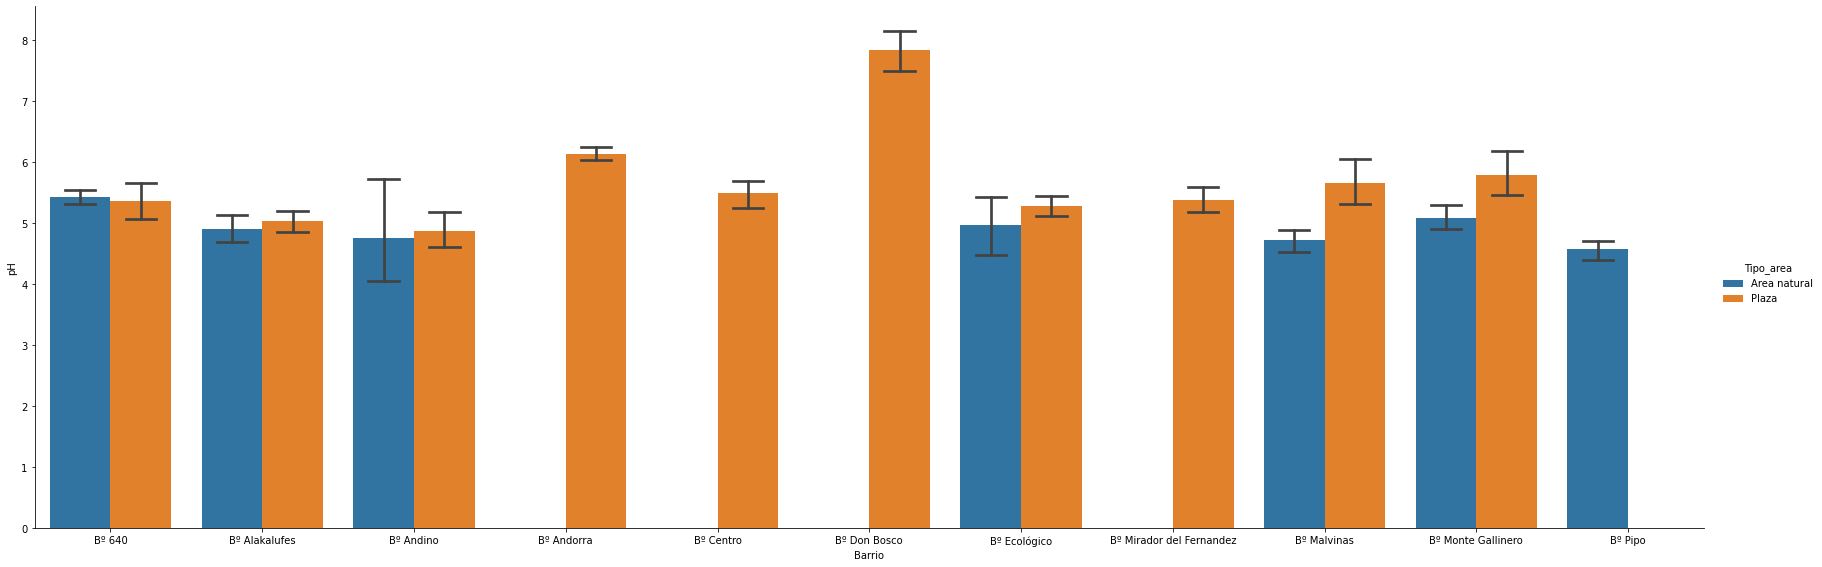

In [299]:
g6 = sns.catplot(data = suelo, kind = "bar", x = 'Barrio_', y = 'pH', hue = 'Tipo_area',
           height = 8, aspect = 3, ci = 95, capsize = 0.2)
g6.set(xlabel = 'Barrio', ylabel = 'pH')
g6.savefig('Barrio_tipo_ph.jpg', bbox_inches='tight')

In [308]:
df = suelo[suelo['Barrio_'].isin(['Bº 640', 'Bº Monte Gallinero', 'Bº Malvinas', 'Bº Alakalufes','Bº Andino', 'Bº Ecológico'])]

In [309]:
df_peso_1 = df[df['Tipo_area'] == 'Plaza']
df_peso_2 = df[df['Tipo_area'] == 'Area natural']
df_peso_1 = df_peso_1.dropna(subset = ['pH'])
df_peso_2 = df_peso_2.dropna(subset = ['pH'])
stats.kruskal(df_peso_1['pH'], df_peso_2['pH'])

KruskalResult(statistic=7.841151862951442, pvalue=0.005107005462406537)

In [310]:
df_peso_2.Barrio_.unique()

array(['Bº 640', 'Bº Alakalufes', 'Bº Andino', 'Bº Ecológico',
       'Bº Malvinas', 'Bº Monte Gallinero'], dtype=object)

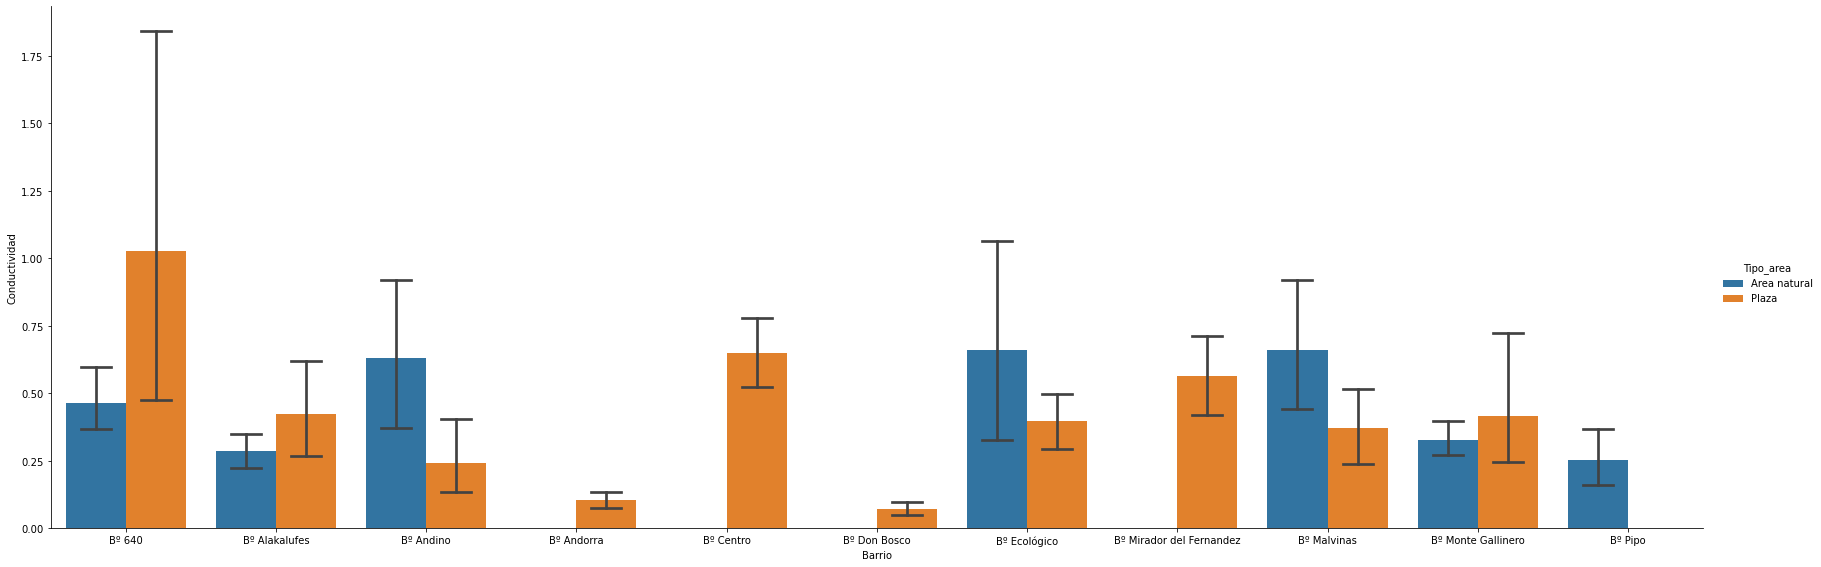

In [302]:
g7 = sns.catplot(data = suelo, kind = "bar", x = 'Barrio_', y = 'Conductividad', hue = 'Tipo_area',
           height = 8, aspect = 3, ci = 95, capsize = 0.2)
g7.set(xlabel = 'Barrio', ylabel = 'Conductividad')
g7.savefig('Barrio_tipo_conduct.jpg', bbox_inches='tight')

In [303]:
df_peso_1 = df[df['Tipo_area'] == 'Plaza']
df_peso_2 = df[df['Tipo_area'] == 'Area natural']
df_peso_1 = df_peso_1.dropna(subset = ['Conductividad'])
df_peso_2 = df_peso_2.dropna(subset = ['Conductividad'])
stats.kruskal(df_peso_1['Conductividad'], df_peso_2['Conductividad'])

KruskalResult(statistic=2.766477540164976, pvalue=0.09625777268167471)

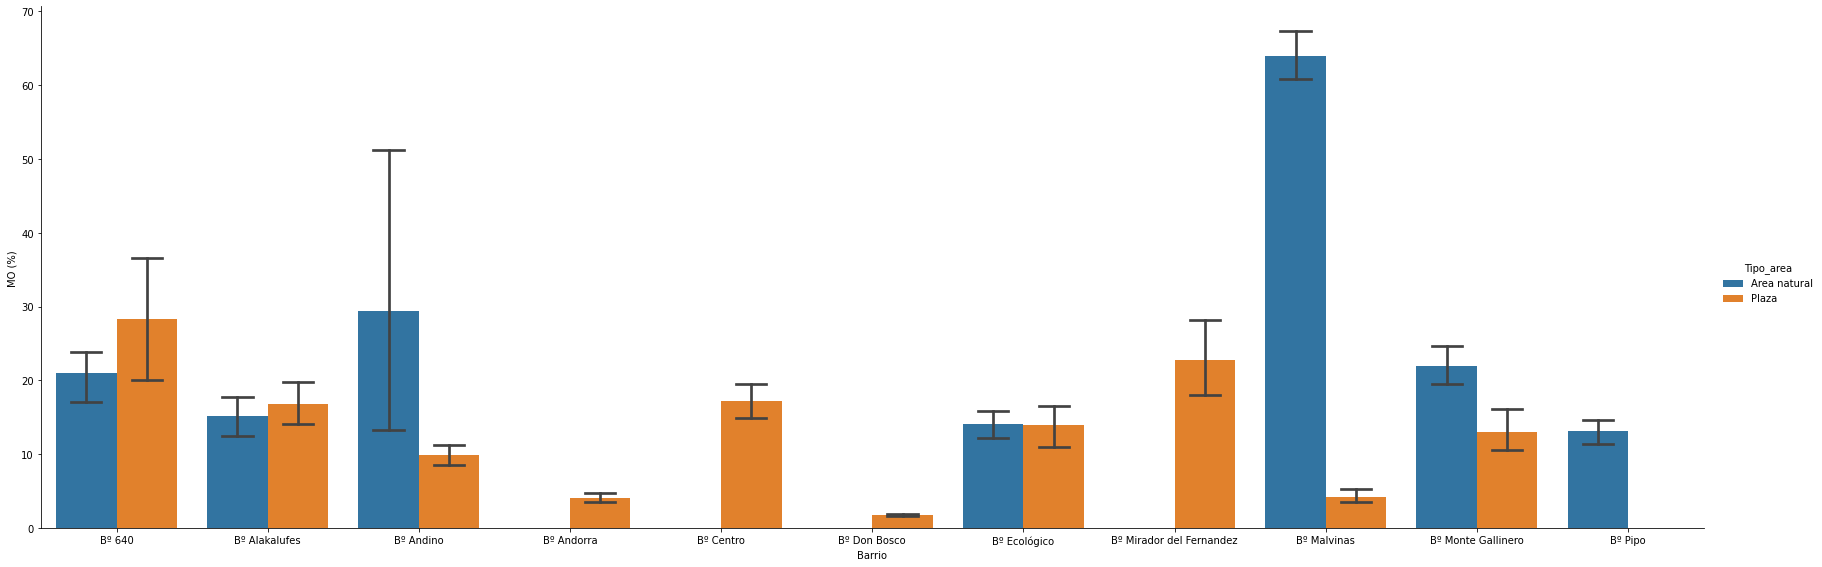

In [304]:
g8 = sns.catplot(data = suelo, kind = "bar", x = 'Barrio_', y = 'MO (%)', hue = 'Tipo_area',
           height = 8, aspect = 3, ci = 95, capsize = 0.2)
g8.set(xlabel = 'Barrio', ylabel = 'MO (%)')
g8.savefig('Barrio_tipo_MO.jpg', bbox_inches='tight')

In [305]:
df_peso_1 = df[df['Tipo_area'] == 'Plaza']
df_peso_2 = df[df['Tipo_area'] == 'Area natural']
df_peso_1 = df_peso_1.dropna(subset = ['MO (%)'])
df_peso_2 = df_peso_2.dropna(subset = ['MO (%)'])
stats.kruskal(df_peso_1['MO (%)'], df_peso_2['MO (%)'])

KruskalResult(statistic=23.767474747474807, pvalue=1.0870393527809387e-06)

In [200]:
print(suelo.shape)
suelo.head()

(155, 8)


,Barrio,Tipo_area,Sector,Cuadrante,MO (%),pH,Conductividad,Barrio_
0,B 640,Area natural,C,C1,24.639023,5.643333,0.836667,Bº 640
1,B 640,Area natural,C,C2,22.525230,5.536667,0.690000,Bº 640
2,B 640,Area natural,C,C3,24.801508,5.520000,0.440000,Bº 640
3,B 640,Area natural,M,M1,14.416375,5.550000,0.405000,Bº 640
4,B 640,Area natural,M,M2,22.261652,5.063333,0.380000,Bº 640


In [280]:
suelo['Sector'] = np.where(suelo['Sector'] == 'C', 'SECTOR C (CERCA)',
                           np.where(suelo['Sector'] == 'M', 'SECTOR M (MEDIO)',
                                  np.where(suelo['Sector'] == 'F', 'SECTOR F (FONDO/LEJOS)', suelo['Sector'])))

In [281]:
suelo['Cuadrante'] = np.where(suelo['Cuadrante'] == 'C2', 'Cuadrante 2',
                        np.where(suelo['Cuadrante'] == 'C1', 'Cuadrante 1',
                            np.where(suelo['Cuadrante'] == 'C3', 'Cuadrante 3',
                                np.where(suelo['Cuadrante'] == 'M2', 'Cuadrante 2',
                                    np.where(suelo['Cuadrante'] == 'M1', 'Cuadrante 1',
                                      np.where(suelo['Cuadrante'] == 'M3', 'Cuadrante 3',
                                        np.where(suelo['Cuadrante'] == 'F2', 'Cuadrante 2',
                                           np.where(suelo['Cuadrante'] == 'F1', 'Cuadrante 1',
                                              np.where(suelo['Cuadrante'] == 'F3', 'Cuadrante 3',suelo['Cuadrante'])))))))))

In [282]:
df_peso['Obs'] = df_peso['Sector']+'-'+df_peso['Cuadrante']+'-'+df_peso['Barrio_']+'-'+df_peso['Area']

In [283]:
df_sum = pd.DataFrame(df_peso.groupby(['Tipo_agrupados', 'Obs'])['valor/m2'].sum())

In [284]:
df_sum.reset_index(inplace = True)

In [285]:
print(df_sum.shape)
df_sum.head()

(1782, 3)


,Tipo_agrupados,Obs,valor/m2
0,ASIM A PELIGROSOS,SECTOR C (CERCA)-Cuadrante 1-Bº 640-Area natural,1.224490
1,ASIM A PELIGROSOS,SECTOR C (CERCA)-Cuadrante 1-Bº 640-Plaza,0.000000
2,ASIM A PELIGROSOS,SECTOR C (CERCA)-Cuadrante 1-Bº Alakalufes-Are...,1.314894
3,ASIM A PELIGROSOS,SECTOR C (CERCA)-Cuadrante 1-Bº Alakalufes-Plaza,0.055070
4,ASIM A PELIGROSOS,SECTOR C (CERCA)-Cuadrante 1-Bº Andino-Area na...,0.102667


In [286]:
df_sum_w = df_sum.pivot(index = 'Obs', columns = 'Tipo_agrupados', values = 'valor/m2')

In [287]:
df_sum_w.reset_index(inplace = True)

In [288]:
df_sum_w.shape

(162, 12)

In [289]:
df_sum_w.head()

Tipo_agrupados,Obs,ASIM A PELIGROSOS,CARTÓN Y PAPELES,COLILLAS,METALES,OTROS INORGÁNICOS,OTROS ORGÁNICOS,PLÁSTICOS,RESTOS DE COMIDA,TETRA PAK,TEXTILES Y DE INDUM,VIDRIO
0,SECTOR C (CERCA)-Cuadrante 1-Bº 640-Area natural,1.224490,1.894133,0.000000,4.075255,1.913265,3.443878,11.230867,0.0,1.339286,5.223214,3.998724
1,SECTOR C (CERCA)-Cuadrante 1-Bº 640-Plaza,0.000000,0.370739,0.008523,0.072443,0.000000,0.021307,0.345170,0.0,0.183239,0.012784,0.136364
2,SECTOR C (CERCA)-Cuadrante 1-Bº Alakalufes-Are...,1.314894,9.162128,0.000000,1.027660,11.505957,1.174468,25.793617,0.0,0.446809,1.059574,0.061277
3,SECTOR C (CERCA)-Cuadrante 1-Bº Alakalufes-Plaza,0.055070,0.047203,0.000000,0.212413,0.448427,0.000000,1.149388,0.0,0.000000,0.000000,0.023601
4,SECTOR C (CERCA)-Cuadrante 1-Bº Andino-Area na...,0.102667,0.105333,0.001333,0.116000,0.096000,0.000000,0.602667,0.0,0.000000,1.446667,6.666667


In [290]:
suelo['Obs'] = suelo['Sector']+'-'+suelo['Cuadrante']+'-'+suelo['Barrio_']+'-'+suelo['Tipo_area']

In [291]:
suelo.head()

,Barrio,Tipo_area,Sector,Cuadrante,MO (%),pH,Conductividad,Barrio_,Obs
0,B 640,Area natural,SECTOR C (CERCA),Cuadrante 1,24.639023,5.643333,0.836667,Bº 640,SECTOR C (CERCA)-Cuadrante 1-Bº 640-Area natural
1,B 640,Area natural,SECTOR C (CERCA),Cuadrante 2,22.525230,5.536667,0.690000,Bº 640,SECTOR C (CERCA)-Cuadrante 2-Bº 640-Area natural
2,B 640,Area natural,SECTOR C (CERCA),Cuadrante 3,24.801508,5.520000,0.440000,Bº 640,SECTOR C (CERCA)-Cuadrante 3-Bº 640-Area natural
3,B 640,Area natural,SECTOR M (MEDIO),Cuadrante 1,14.416375,5.550000,0.405000,Bº 640,SECTOR M (MEDIO)-Cuadrante 1-Bº 640-Area natural
4,B 640,Area natural,SECTOR M (MEDIO),Cuadrante 2,22.261652,5.063333,0.380000,Bº 640,SECTOR M (MEDIO)-Cuadrante 2-Bº 640-Area natural


In [292]:
suelo.shape

(154, 9)

In [293]:
suelo_agrup = pd.DataFrame(suelo.groupby(['Obs'])['MO (%)', 'pH', 'Conductividad'].mean())

In [294]:
suelo_agrup.reset_index(inplace = True)
suelo_agrup.head()

,Obs,MO (%),pH,Conductividad
0,SECTOR C (CERCA)-Cuadrante 1-Bº 640-Area natural,24.639023,5.643333,0.836667
1,SECTOR C (CERCA)-Cuadrante 1-Bº 640-Plaza,15.933996,5.770000,0.320000
2,SECTOR C (CERCA)-Cuadrante 1-Bº Alakalufes-Are...,11.573596,5.625000,0.260000
3,SECTOR C (CERCA)-Cuadrante 1-Bº Alakalufes-Plaza,12.050624,4.740000,0.240000
4,SECTOR C (CERCA)-Cuadrante 1-Bº Andino-Area na...,9.041414,6.930000,0.540000


In [295]:
suelo_agrup.shape

(135, 4)

In [296]:
df = df_sum_w.merge(suelo_agrup[['MO (%)', 'pH', 'Conductividad', 'Obs']], how = 'inner', on = ['Obs'])

In [297]:
df.shape

(135, 15)

In [298]:
df.to_excel('df_residuos_suelo.xls')

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.iloc[:,1:]
X = X.dropna()

X = scaler.fit_transform(X)

In [170]:
from sklearn.decomposition import PCA

PCA = PCA(n_components=8)
components = PCA.fit_transform(X)
PCA.components_

array([[ 0.35676253,  0.3076059 ,  0.14081613,  0.04682924,  0.01391833,
         0.35928616,  0.47192393, -0.00821682,  0.35617129,  0.19880689,
         0.46880811,  0.08358293, -0.10145401, -0.02397377],
       [-0.40440696,  0.5031679 , -0.14623353, -0.01371996, -0.14135195,
        -0.40613931, -0.14860924, -0.13553792,  0.43003898,  0.06677536,
         0.17271086, -0.26616112,  0.02604423, -0.21349072],
       [-0.26694391,  0.0859007 ,  0.25934379,  0.21850557,  0.50661039,
        -0.26323469, -0.01970345,  0.52146798,  0.05219785,  0.22972948,
         0.06024364,  0.26512737, -0.14109021,  0.24241688],
       [ 0.13755373,  0.02298616, -0.11244142, -0.13766125,  0.43724394,
         0.13152252,  0.01968662,  0.4301354 ,  0.00387964, -0.2657368 ,
         0.06270968, -0.4826737 ,  0.37779614, -0.32373604],
       [-0.07662791, -0.16447043,  0.59781413, -0.03044207, -0.13304206,
        -0.0796897 ,  0.11768873, -0.09321656, -0.06756902,  0.51274958,
        -0.11454071, -0.17

In [171]:
cumVar = pd.DataFrame(np.cumsum(PCA.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(PCA.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2", 2: "PC3", 3: "PC4",4: "PC5", 5: "PC6",6: "PC7", 7: "PC8"})

,VarPerc,cumVarPerc
PC1,26.892640,26.892640
PC2,14.763922,41.656561
PC3,13.211442,54.868003
PC4,12.376940,67.244943
PC5,10.957323,78.202266
PC6,7.445507,85.647773
PC7,5.368219,91.015992
PC8,2.912413,93.928405


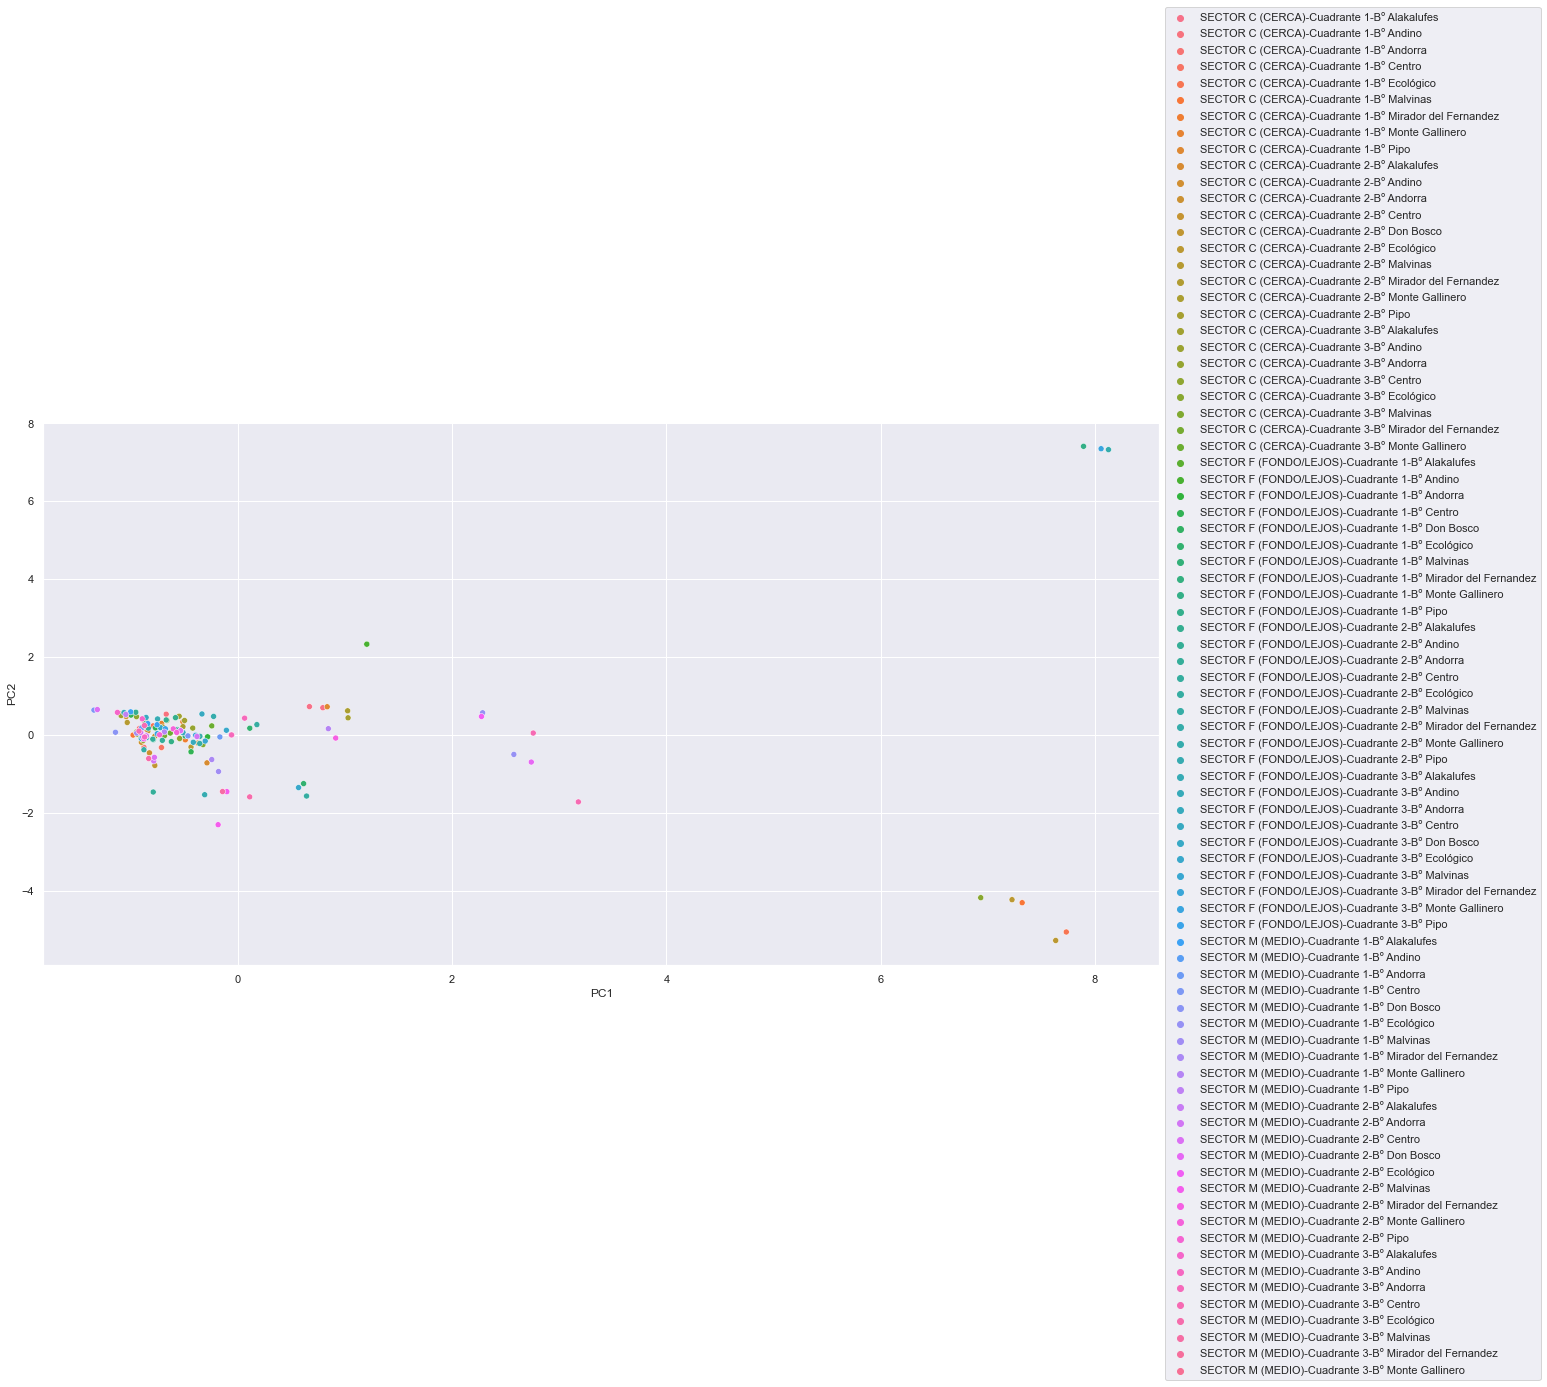

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

componentsDf = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
pcaDf = pd.concat([componentsDf, df['Obs']], axis=1)

plt.figure(figsize=(20, 10))

g = sns.scatterplot(data=pcaDf, x="PC1", y="PC2", hue = 'Obs')

g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [182]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

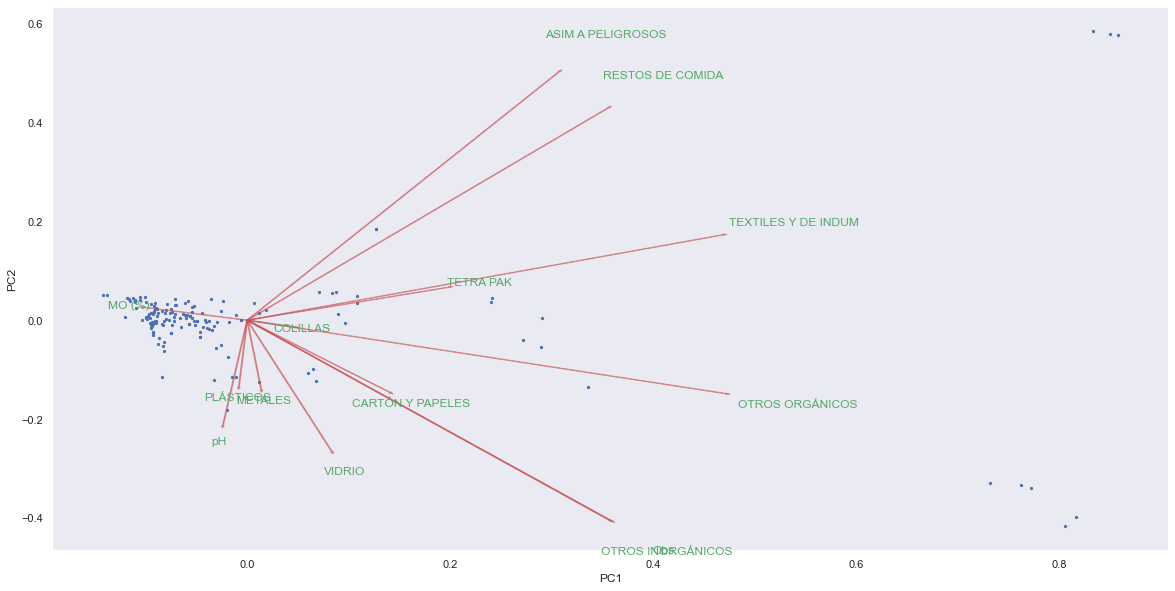

In [196]:
plt.figure(figsize=(20, 10))
biplot(components, np.transpose(PCA.components_), list(df.columns))